In [305]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [282]:
path_to_data = "../DATA/Raw/"
clin_df = pd.read_csv(os.path.join(path_to_data, "dataset_495_long.csv"))

## Exploring the # of participants (by number of years of visits required)

In [283]:
unique_projids = clin_df["projid"].unique()
print("# of unique patients: ", len(unique_projids))

# of unique patients:  3194


Distribution of participants' number of visits
1 visits: 3194 patients
3 visits: 2636 patients
5 visits: 2086 patients
10 visits: 1061 patients


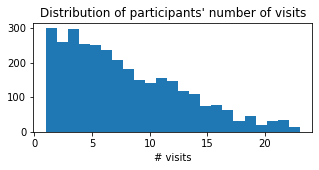

In [284]:
num_visits_list = np.array([len(clin_df[clin_df["projid"] == pid]) for pid in unique_projids])
plt.figure(figsize=(5,2))
plt.hist(num_visits_list,bins=23)
plt.title("Distribution of participants' number of visits");
plt.xlabel("# visits")


print("Distribution of participants' number of visits")
for x in [1,3,5,10]:
    print("%i visits: %i patients"%(x, np.sum(num_visits_list>=x)))

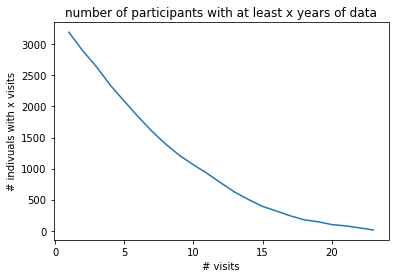

In [285]:
num_subs_min_years = [np.sum(num_visits_list>=x) for x in range(1, max(num_visits_list)+1)]
plt.plot(np.arange(1, max(num_visits_list)+1), num_subs_min_years)
plt.title("number of participants with at least x years of data")
plt.xlabel("# visits")
plt.ylabel("# indivuals with x visits");

## Exploring the frequency of different cognitive trajectories among participants

In [286]:
projids_min2y = unique_projids[np.where(num_visits_list>=2)[0]]
var_of_interest = "dcfdx"

first_dxs = []
last_dxs = []
pids_kept = []
for pid in projids_min2y:
    cur_pid = clin_df[clin_df["projid"] == pid]
    first,last = cur_pid[cur_pid["fu_year"]==cur_pid["fu_year"].min()][var_of_interest].values[0], cur_pid[cur_pid["fu_year"]==cur_pid["fu_year"].max()][var_of_interest].values[0]
    if ~np.isnan(first) and ~np.isnan(last):
        first_dxs.append(first)
        last_dxs.append(last)
        pids_kept.append(pid)

In [287]:
first_dxs = np.array(first_dxs).flatten()
last_dxs = np.array(last_dxs).flatten()
print("# of participants with 6 years of data and known 1st and last status:", len(first_dxs))

# of participants with 6 years of data and known 1st and last status: 2619


In [288]:
dcfdx_dementia_mapping = {1: "Normal", 2: "MCI", 3: "MCI", 4: "Dementia", 5:"Dementia", 6:"Dementia"}
dementia_to_number_mapping = {"Normal":2, "MCI":1, "Dementia":0}

In [289]:
trajectories = [str(dcfdx_dementia_mapping[f])+"-"+str(dcfdx_dementia_mapping[l]) for f,l in zip(first_dxs,last_dxs)]

In [290]:
traj, counts = np.unique(trajectories, return_counts=True)

In [291]:
order = ["Normal", "MCI", "Dementia"]
count_table = np.zeros([len(order), len(order)])
for idx, trajname in enumerate(traj):
    c = counts[idx]
    start,end = trajname.split("-")
    count_table[order.index(start),order.index(end)] = c

In [292]:
print("Frequencies of trajectories:")
pd.DataFrame(count_table, columns=order, index=order)

Frequencies of trajectories:


,Normal,MCI,Dementia
Normal,1146.0,341.0,343.0
MCI,153.0,222.0,276.0
Dementia,3.0,6.0,129.0


In [293]:
print("Percentages of trajectories:")
pd.DataFrame(np.round(count_table / np.sum(count_table) , 3)*100 , columns=order, index=order)


Percentages of trajectories:


,Normal,MCI,Dementia
Normal,43.8,13.0,13.1
MCI,5.8,8.5,10.5
Dementia,0.1,0.2,4.9


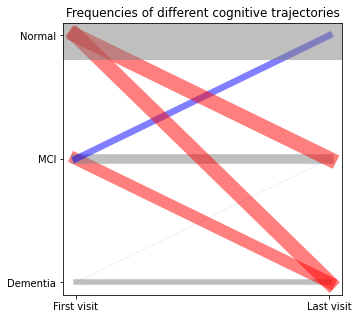

In [294]:
normed_counts_width = (counts - counts.min())/(counts.max()-counts.min())
max_width = 50

plt.figure(figsize=(5,5))
for i in range(len(traj)):
    c = normed_counts_width[i] * max_width 
    traj_numeric = [dementia_to_number_mapping[x] for x in traj[i].split("-")]
    
    if traj_numeric[1]-traj_numeric[0]>0:
        color = "blue"
    elif traj_numeric[1]-traj_numeric[0]<0:
        color = "red"
    else:
        color = "grey"
        
    plt.plot([0,1],traj_numeric, linewidth=c, alpha=.5, color=color)
plt.xticks(np.arange(2), ("First visit", "Last visit"))
plt.yticks(np.arange(3), ("Dementia", "MCI", "Normal"))
plt.title("Frequencies of different cognitive trajectories");

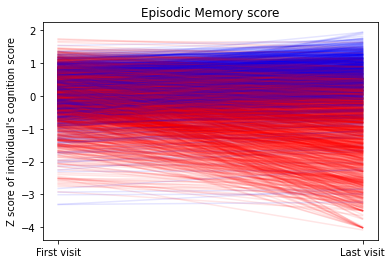

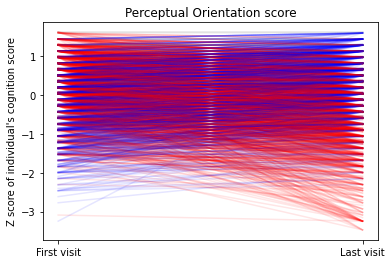

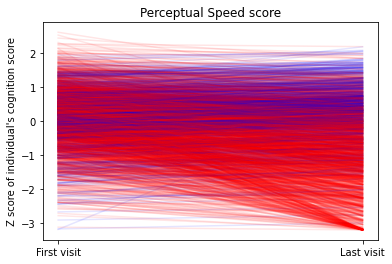

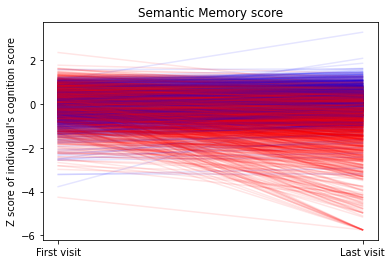

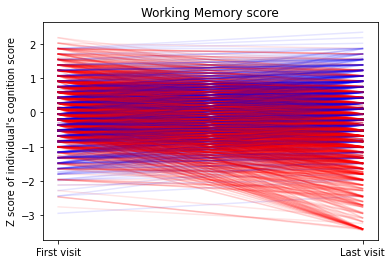

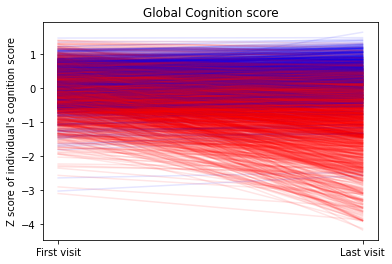

In [295]:
cogn_var_mapper = {'cogn_ep': "Episodic Memory", 'cogn_po': "Perceptual Orientation", 'cogn_ps': "Perceptual Speed", 'cogn_se': "Semantic Memory", 'cogn_wo': "Working Memory", 'cogn_global': "Global Cognition"}

for var_of_interest in ['cogn_ep', 'cogn_po', 'cogn_ps', 'cogn_se', 'cogn_wo', 'cogn_global']:

    first_dxs = []
    last_dxs = []
    pids_kept = []
    for pid in projids_min2y:
        cur_pid = clin_df[clin_df["projid"] == pid]
        first,last = cur_pid[cur_pid["fu_year"]==cur_pid["fu_year"].min()][var_of_interest].values[0], cur_pid[cur_pid["fu_year"]==cur_pid["fu_year"].max()][var_of_interest].values[0]
        if ~np.isnan(first) and ~np.isnan(last):
            first_dxs.append(first)
            last_dxs.append(last)
            pids_kept.append(pid)

    plt.figure()
    for row in np.vstack([first_dxs, last_dxs]).T:
        if row[1]-row[0]>0:
            color = "blue"
        elif row[1]-row[0]<0:
            color = "red"
        else:
            color = "grey"
        plt.plot([0,1],row,alpha=.1,color=color)
    
    plt.xticks(np.arange(2), ("First visit", "Last visit"))
    plt.ylabel("Z score of individual's cognition score")
    plt.title("%s score"%cogn_var_mapper[var_of_interest]);

## New flow chart

In [306]:
path_to_data = "../DATA/Raw/"
clin_df = pd.read_csv(os.path.join(path_to_data, "dataset_495_long.csv"))

In [307]:
clinical = pd.read_csv(os.path.join(path_to_data, "ROSMAP_clinical.csv"))

In [308]:
basic = pd.read_csv(os.path.join(path_to_data, "dataset_495_basic.csv"))

In [309]:
basic_agedeath = basic[["projid", "age_death"]].dropna()["projid"].unique()
clinical_agedeath = clinical[["projid", "age_death"]].dropna()["projid"].unique()
df_projids = clin_df["projid"].unique()
len(np.setdiff1d(basic_agedeath, clinical_agedeath)), len(np.setdiff1d(clinical_agedeath, basic_agedeath))

(496, 1)

In [310]:
max_fu_years = clin_df["fu_year"].max()+1

In [311]:
def get_cog_label(x):
    if x==1:
        return "Normal"
    elif x==2 or x==3:
        return "MCI"
    elif x==4 or x==5 or x==6:
        return "Dementia"
    else:
        return "Unknown"

In [312]:
projid_statuses = {}

for pid in clin_w_death["projid"].unique():
    subdf = clin_w_death[clin_w_death["projid"]==pid]
    
    statuses = list(subdf["dcfdx"].apply(get_cog_label).values)

    # dropped out or current
    if pd.isnull(subdf["age_death"].values[0]):
#         while len(statuses) < max_fu_years:
#             statuses.append("Dropped out or current")
        pass
    # have death year
    else:
        # if we know the age of their last visit and age of their death, we can calculate how many visits they "missed" 
        # prior to dying (i.e., how many years elapsed between their final visit and death)
        if (subdf["age_at_visit_max"].values[0] != "90+") and (subdf["age_death"].values[0] != "90+"):
            missing_years = (float(subdf["age_death"].values[0]) - float(subdf["age_at_visit_max"].values[0]))
            for _ in range(int(np.floor(missing_years))):
                statuses.append("Missed visit")
        
        while len(statuses) < max_fu_years:
            statuses.append("Deceased")
        
    projid_statuses[pid] = statuses


In [313]:
rows = []
for pid in projid_statuses.keys():
    for i,status in enumerate(projid_statuses[pid]):
        if i<10:
            rows.append([pid, "0"+str(i), status])
        else:
            rows.append([pid, str(i), status])

In [314]:
statuses_over_time = pd.DataFrame(np.array(rows), columns=["projid", "year", "status"])
df_plot = statuses_over_time.groupby(['status','year']).size().reset_index().pivot(columns='status', index='year', values=0)


In [315]:
df_plot = df_plot[["Normal", "MCI", "Dementia", "Unknown", "Missed visit", "Deceased"]]

df_plot.columns = ["Cognitively normal", "Mild cognitive impairment", "Dementia", "Visit with no cognitive status recorded", "Missed visit (prior to death)", "Deceased"]

Text(0, 0.5, 'Count')

<Figure size 720x360 with 0 Axes>

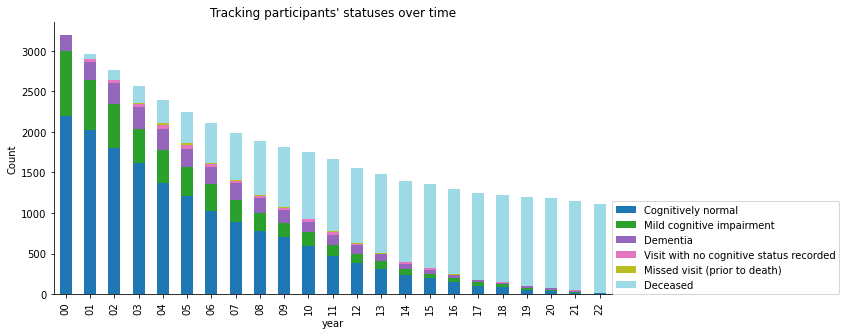

In [316]:
plt.figure(figsize=(10,5))
axes = df_plot.plot(kind='bar', stacked=True, figsize=(10,5), cmap="tab20")
axes.legend(loc=(1,0))  
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title("Tracking participants' statuses over time")
axes.set_ylabel("Count")